**Shourya ------- EDA on VGG_Face2 dataset**

In [97]:
from PIL import Image
import seaborn as sns

On exploring the VGG_face2 dataset, we noticed the train dataset is a very huge file around 30GB.
We found it hard to access the data from JupyterHub. With a motivation to understand if the dataset is useful on a smaller scale 
we explored the test dataset which was approximately 2GB.

On exploring the test data we observed following details
a) we had around 500 unique personalities grouped into 500 classes.
b) Each class further has approximately 87 to 843 images of the same personality with different poses and background
c) different images are of different sizes
d) Images are not in sequential order

In [11]:
# We are reading entire test dataset using Keras ImageDataGenerator and resizing the images to (128, 128) 
# to maintain uniformity for all images.
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(directory="test/", class_mode="input",
                                            target_size=(128, 128), batch_size=32)

Found 169396 images belonging to 500 classes.


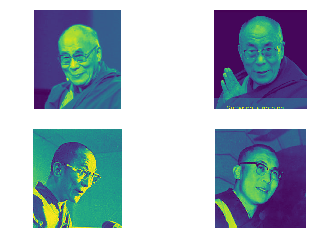

In [141]:
# Below pictures are from the first class which belongs to the Celebrity "Dalai Lama"
# Here we notice different poses of the same personality
img1 = cv2.imread('test/n000001/0001_01.jpg',0)
plt.subplot(221)
plt.imshow(img1)
plt.axis('off')
img1 = cv2.imread('test/n000001/0002_01.jpg',0)
plt.subplot(222)
plt.imshow(img1)
plt.axis('off')
img1 = cv2.imread('test/n000001/0481_01.jpg',0)
plt.subplot(223)
plt.imshow(img1)
plt.axis('off')
img1 = cv2.imread('test/n000001/0485_02.jpg',0)
plt.subplot(224)
plt.imshow(img1)
plt.axis('off');

In [50]:
## Compute number of pixels in an image
# Images from different Class belonging to the different celebrity, but they are of different sizes
img = Image.open('test/n000001/0001_01.jpg')
width, height = img.size
print("Dimensions of Image from Class 1:", img.size, "Total pixels:", width * height)

img = Image.open('test/n000040/0011_01.jpg')
width, height = img.size
print("Dimensions of Image from Class 2:", img.size, "Total pixels:", width * height)

Dimensions of Image from Class 1: (199, 227) Total pixels: 45173
Dimensions of Image from Class 2: (253, 244) Total pixels: 61732


In [52]:
# Images from same Class belonging to the same celebrity, but they are of different dimensions

img = Image.open('test/n000040/0001_01.jpg')
width, height = img.size
print("Dimensions of Image from Class 40, image number 0001_01:", img.size, "Total pixels:", width * height)
img = Image.open('test/n000040/0014_01.jpg')
width, height = img.size
print("Dimensions of Image from Class 40, image number 0014_01:", img.size, "Total pixels:", width * height)

Dimensions of Image from Class 40, image number 0001_01: (245, 280) Total pixels: 68600
Dimensions of Image from Class 40, image number 0014_01: (168, 191) Total pixels: 32088


We plotted a batch of images just to see how they look after resizing the images. Here we noticed some images has more than 1 person in the photo and there is text on couple of images. Resizing the image has cropped some photos making it unusable while some photos are perfect for analysis. This is because we have different images with different sizes.

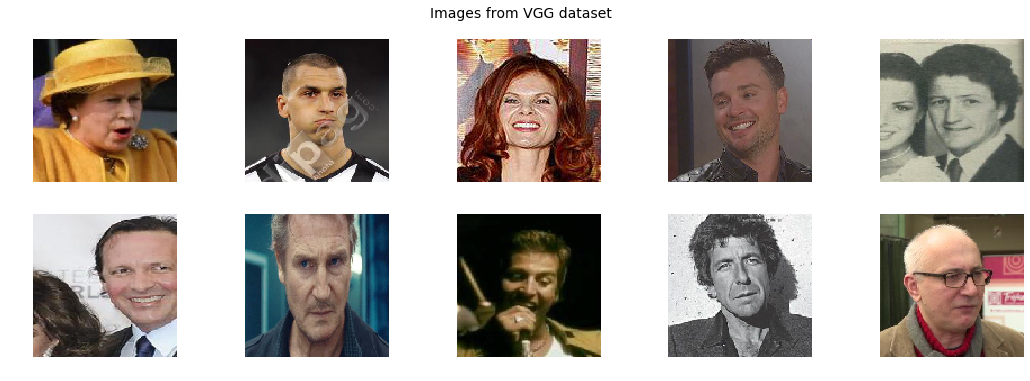

In [144]:
# Plot of few images taken from a batch
x_batch, y_batch = next(data_generator)
image = x_batch[i]


# Plot of images from VGG test dataset
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5, figsize=(15, 5))
axs=[ax1,ax2,ax3,ax4,ax5,ax6, ax7, ax8, ax9, ax10]
for i in range (10):
    image = x_batch[i]
    axs[i].imshow(image)
    axs[i].axis('off')
plt.suptitle('Images from VGG dataset', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

Histogram is a graph where we get intuition about contrast, brightness and intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.  

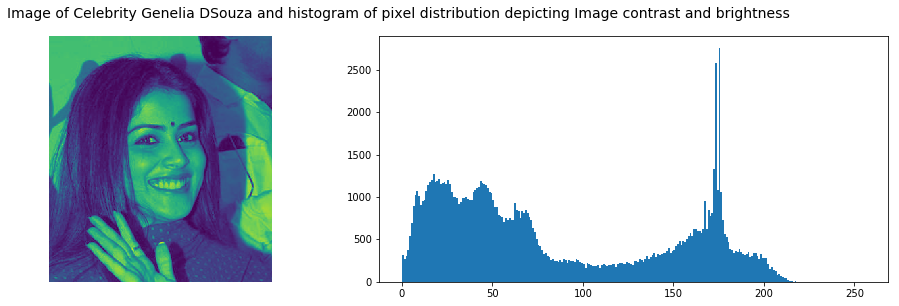

In [142]:
img = cv2.imread('test/n003001/0162_01.jpg',0)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plt.suptitle("Image of Celebrity Genelia DSouza and histogram of pixel distribution depicting Image contrast and brightness", 
          fontsize=14,y=1.05);
ax[1].hist(img.ravel(),256,[0,256]); 
ax[0].imshow(img)
ax[0].axis('off');
plt.tight_layout();
plt.show()

The VGG_Face2 dataset has more male samples than female samples, which makes the gender imbalanced. We can combat this problem by two simple methods. One way would be to apply class weighting when building the CNN. Another approach is to undersample by culling the number of male images randomly, thereby forcing a more balanced dataset. Both approaches will be assessed, and we will choose an approach the minimizes the classification error the most.

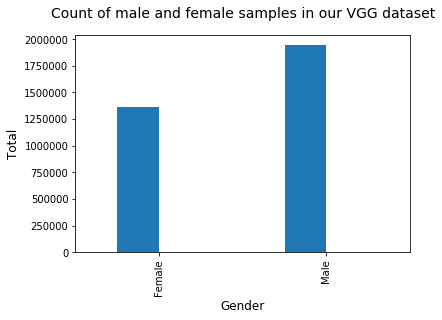

In [146]:
vggIdentity['Gender1']=np.where(vggIdentity.Gender=='m','Male','Female')
ax = vggIdentity.groupby('Gender1').sum().plot.bar(grid=False)
ax.set_title('Count of male and female samples in our VGG dataset', fontsize=14, y=1.05)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Total', fontsize=12)
ax.legend().set_visible(False)